SCENARIO 1:
Predict ocean water temperature using environmental and depth-related features.

Dataset (Kaggle – Public):
https://www.kaggle.com/datasets/sohier/calcofi
Target Variable:
•	Water Temperature (T_degC)
Sample Input Features
•	Depth (m)
•	Salinity
•	Oxygen
•	Latitude
•	Longitude

IN-LAB TASKS
•	Import necessary Python libraries (NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn).
•	Load the CalCOFI dataset into a Pandas DataFrame
•	Select relevant numerical features and target variable.
•	Handle missing values using mean/median imputation.
•	Perform feature scaling using StandardScaler.
•	Split the dataset into training and testing sets.
•	Train a Linear Regression model using Scikit-learn.
•	Predict water temperature for test data.
•	Evaluate model performance using:
– Mean Squared Error (MSE)
– Root Mean Squared Error (RMSE)
– R² Score
•	Visualize:
– Actual vs Predicted temperature
– Residual errors
•	Optimize model performance using:
– Feature selection
– Regularization (Ridge / Lasso)


SREENIDHI - 24BAD114
MSE: 4.098131415053706
RMSE: 2.024384206383192
R2 Score: 0.797482617481732


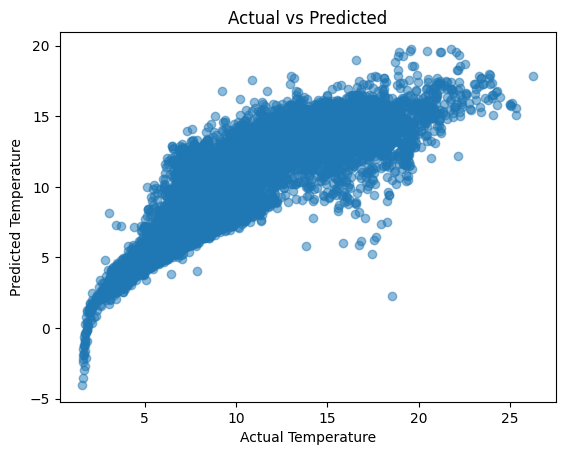

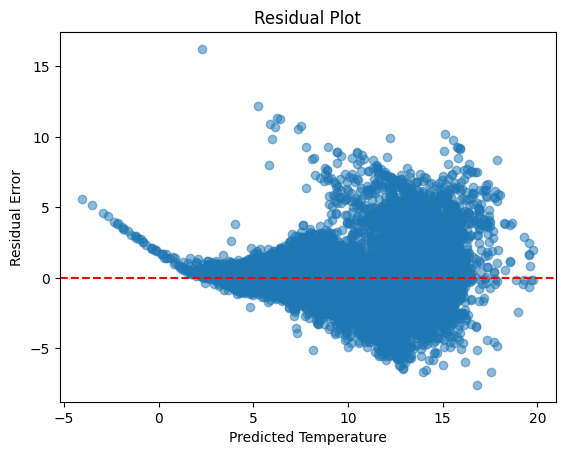

Ridge Score: 0.79748163296983
Lasso Score: 0.7971946793696604


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

print("SREENIDHI - 24BAD114")

# UPDATED LINE: We changed the path to look for the file directly in Colab
# If the file is named something else, change "bottle.csv" to that name.
df = pd.read_csv("/content/bottle.csv", low_memory=False)

features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

# Clean the data
data = df[features + [target]].dropna()

X = data[features]
y = data[target]

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Plot 1: Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.5) # Added alpha for better visibility
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted")
plt.show()

# Plot 2: Residuals
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel("Predicted Temperature")
plt.ylabel("Residual Error")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--') # Added a zero line for reference
plt.show()

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge Score:", ridge.score(X_test, y_test)) # Added print to see result

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
print("Lasso Score:", lasso.score(X_test, y_test)) # Added print to see result

SCENARIO 2:
Classify whether LIC stock price will increase (1) or decrease (0) based on historical data.

Dataset (Kaggle – Public):
https://www.kaggle.com/datasets/debashis74017/lic-stock-price-data
Target Variable (Derived):
• Price Movement
– 1 → Closing price > Opening price
– 0 → Closing price ≤ Opening price
Input Features:
• Open
• High
• Low
• Volume

IN-LAB TASKS (Logistic Regression)
•	Import required Python libraries.
•	Load LIC stock dataset into Pandas.
•	Create a binary target variable (Price Movement).
•	Handle missing values.
•	Perform feature scaling.
•	Split the dataset into training and testing sets.
•	Train a Logistic Regression model.
•	Predict stock movement for test data.
•	Evaluate classification performance using:
– Accuracy
– Precision
– Recall
– F1-Score
– Confusion Matrix
•	Visualize:
– ROC Curve
– Feature importance
•	Optimize model using:
– Hyperparameter tuning (C, penalty)
– Regularization


SREENIDHI - 24BAD114
Accuracy: 0.6132971506105834
Precision: 1.0
Recall: 0.030612244897959183
F1 Score: 0.0594059405940594
Confusion Matrix:
 [[443   0]
 [285   9]]


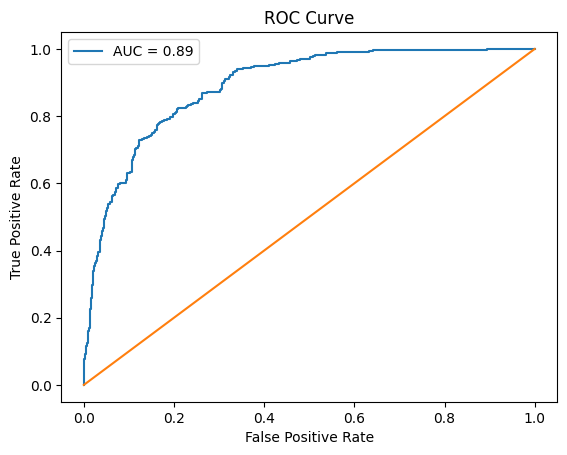

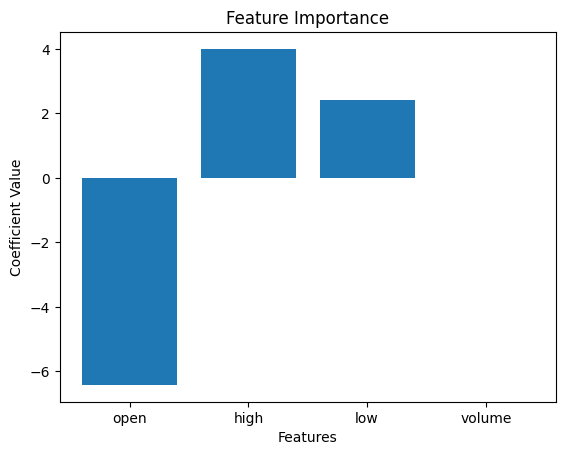

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

print("SREENIDHI - 24BAD114")

df = pd.read_csv(r"/content/LICI - 10 minute data.csv")

open_col = [c for c in df.columns if "open" in c.lower()][0]
close_col = [c for c in df.columns if "close" in c.lower() or "ltp" in c.lower()][0]
high_col = [c for c in df.columns if "high" in c.lower()][0]
low_col = [c for c in df.columns if "low" in c.lower()][0]
vol_col = [c for c in df.columns if "vol" in c.lower()][0]

df['Price_Movement'] = np.where(df[close_col] > df[open_col], 1, 0)

features = [open_col, high_col, low_col, vol_col]
target = 'Price_Movement'
data = df[features + [target]].dropna()
X = data[features]
y = data[target]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

plt.figure()
plt.bar(features, model.coef_[0])
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance")
plt.show()